# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set()
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_recall_fscore_support
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split

## Reading Train Dataset

In [2]:
df2=pd.read_csv("Test.csv")

In [3]:
df=pd.read_csv("Train.csv")

In [4]:
df.sample(6)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Global_Sales
13040,Daito Giken Koushiki Pachi-Slot Simulator: Hih...,PSP,2011.0,Misc,Paon,0.00,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.02
3822,F.E.A.R. 2: Project Origin,X360,2009.0,Shooter,Warner Bros. Interactive Entertainment,0.32,0.15,0.00,77.0,68.0,8,114.0,Monolith Productions,M,0.52
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,Electronic Arts,0.43,0.11,0.00,80.0,18.0,9.1,22.0,EA Canada,T,0.56
3184,Taiko no Tatsujin: Chibi Dragon to Fushigi na Orb,3DS,2012.0,Misc,Namco Bandai Games,0.00,0.00,0.63,NaN,NaN,NaN,NaN,NaN,NaN,0.63
6314,NHL 07,X360,2006.0,Sports,Electronic Arts,0.25,0.00,0.00,79.0,49.0,5.3,167.0,EA Sports,E10+,0.27
13523,Bakumatsu Rock: Ultra Soul,PSV,2014.0,Misc,Marvelous Interactive,0.00,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.02


## Train Dataset EDA(exploratory data analysis)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576 entries, 0 to 14575
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             14574 non-null  object 
 1   Platform         14576 non-null  object 
 2   Year_of_Release  14344 non-null  float64
 3   Genre            14574 non-null  object 
 4   Publisher        14527 non-null  object 
 5   NA_Sales         14576 non-null  float64
 6   EU_Sales         14576 non-null  float64
 7   JP_Sales         14576 non-null  float64
 8   Critic_Score     7217 non-null   float64
 9   Critic_Count     7217 non-null   float64
 10  User_Score       8760 non-null   object 
 11  User_Count       6796 non-null   float64
 12  Developer        8829 non-null   object 
 13  Rating           8704 non-null   object 
 14  Global_Sales     14576 non-null  float64
dtypes: float64(8), object(7)
memory usage: 1.7+ MB


## Changing the User_Score Dtype Object into Float  

In [6]:
df["User_Score"].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '0.6', '1.4', '0.9', '1', '1.3', '0.2', '9.7'],
      dtype=object)

In [7]:
df["User_Score"]=np.where(df["User_Score"]=="tbd",0, df["User_Score"])

In [8]:
df["User_Score"]=df["User_Score"].astype(float)

In [9]:
df["User_Score"].dtypes

dtype('float64')

## checking for duplicate in data set

In [10]:
df.duplicated().sum()

0

## Checking for null values

In [11]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     232
Genre                 2
Publisher            49
NA_Sales              0
EU_Sales              0
JP_Sales              0
Critic_Score       7359
Critic_Count       7359
User_Score         5816
User_Count         7780
Developer          5747
Rating             5872
Global_Sales          0
dtype: int64

## Treatment of null values

In [12]:
df["Name"].fillna("Need for Speed: Most Wanted", inplace = True)
df["Year_of_Release"].fillna("2009.0", inplace = True)
df["Genre"].fillna("Racing", inplace = True)
df["Publisher"].fillna("Electronic Arts", inplace = True)
df["Critic_Score"].fillna(69.67, inplace = True)
df["Critic_Count"].fillna(27.30, inplace = True)
df["User_Count"].fillna(172.51, inplace = True)
df["Developer"].fillna("Ubisoft", inplace = True)
df["Rating"].fillna("E", inplace = True)
df["User_Score"].fillna(7.15, inplace =True)

## Null values after treatment

In [13]:
df.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
Global_Sales       0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576 entries, 0 to 14575
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             14576 non-null  object 
 1   Platform         14576 non-null  object 
 2   Year_of_Release  14576 non-null  object 
 3   Genre            14576 non-null  object 
 4   Publisher        14576 non-null  object 
 5   NA_Sales         14576 non-null  float64
 6   EU_Sales         14576 non-null  float64
 7   JP_Sales         14576 non-null  float64
 8   Critic_Score     14576 non-null  float64
 9   Critic_Count     14576 non-null  float64
 10  User_Score       14576 non-null  float64
 11  User_Count       14576 non-null  float64
 12  Developer        14576 non-null  object 
 13  Rating           14576 non-null  object 
 14  Global_Sales     14576 non-null  float64
dtypes: float64(8), object(7)
memory usage: 1.7+ MB


In [15]:
df.shape

(14576, 15)

## checking for outliers

In [16]:
df.describe(percentiles=[0.01,0.02, .03,0.04, 0.05, 0.1, .2, .25, .3, .4, .5,.75,.9, .95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,...,40%,50%,75%,90%,95%,96%,97%,98%,99%,max
NA_Sales,14576.0,0.295577,0.866491,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.05,0.10,0.28,0.69,1.19,1.40,1.6800,2.080,3.0100,41.36
EU_Sales,14576.0,0.163957,0.536354,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.03,0.13,0.39,0.69,0.84,1.0400,1.330,2.0550,28.96
JP_Sales,14576.0,0.085659,0.329646,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.03,0.21,0.41,0.49,0.6200,0.870,1.3625,10.22
Critic_Score,14576.0,69.672992,9.691363,13.00,37.00,42.00,46.00,49.00,51.00,58.00,...,69.67,69.67,71.00,82.00,86.00,87.00,88.0000,90.000,92.0000,98.00
Critic_Count,14576.0,27.305962,13.695582,3.00,4.00,5.00,5.00,6.00,7.00,10.00,...,27.30,27.30,27.30,42.00,55.00,59.00,64.0000,70.000,79.0000,113.00
User_Score,14576.0,6.187822,2.642646,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.15,7.15,7.40,8.30,8.70,8.80,8.8000,8.900,9.1000,9.70
User_Count,14576.0,172.511443,393.706337,4.00,4.00,5.00,5.00,6.00,6.00,9.00,...,172.51,172.51,172.51,172.51,310.00,431.00,594.0000,921.500,1601.0000,10665.00
Global_Sales,14576.0,0.598972,1.647699,0.01,0.01,0.01,0.01,0.01,0.02,0.02,...,0.15,0.22,0.55,1.34,2.22,2.62,3.1375,4.055,6.0300,82.53


## Treatment of Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x13b349d43d0>,
 'caps': [<matplotlib.lines.Line2D at 0x13b349d4a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b349d40a0>],
 'medians': [<matplotlib.lines.Line2D at 0x13b34e69190>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b34e69520>],
 'means': []}

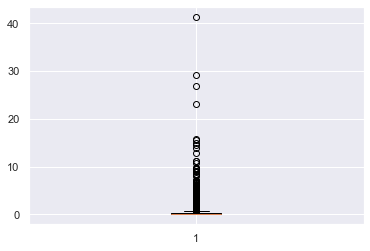

In [17]:
plt.boxplot(df["NA_Sales"])

In [18]:

df["NA_Sales"]=np.where(df["NA_Sales"]>30, 30, df["NA_Sales"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b35301130>,
 'caps': [<matplotlib.lines.Line2D at 0x13b35301880>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b352f1d60>],
 'medians': [<matplotlib.lines.Line2D at 0x13b35301fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b35309370>],
 'means': []}

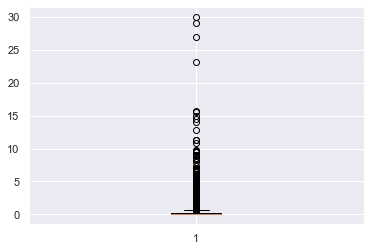

In [19]:
plt.boxplot(df["NA_Sales"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b353699d0>,
 'caps': [<matplotlib.lines.Line2D at 0x13b35377160>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b35369640>],
 'medians': [<matplotlib.lines.Line2D at 0x13b35377880>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b35377c10>],
 'means': []}

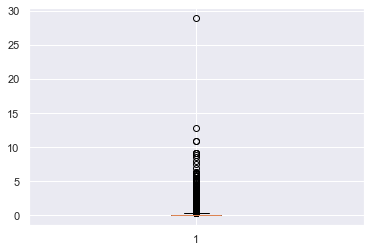

In [20]:
plt.boxplot(df["EU_Sales"])

In [21]:
df["EU_Sales"]=np.where(df["EU_Sales"]>15, 15, df["EU_Sales"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b353df190>,
 'caps': [<matplotlib.lines.Line2D at 0x13b353df8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b353cedc0>],
 'medians': [<matplotlib.lines.Line2D at 0x13b353ea040>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b353ea3d0>],
 'means': []}

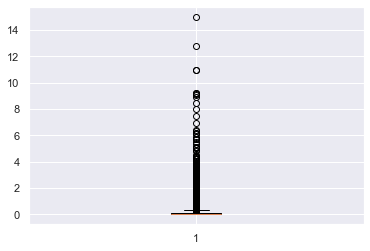

In [22]:
plt.boxplot(df["EU_Sales"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b35444af0>,
 'caps': [<matplotlib.lines.Line2D at 0x13b35451280>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b35444760>],
 'medians': [<matplotlib.lines.Line2D at 0x13b354519a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b35451d30>],
 'means': []}

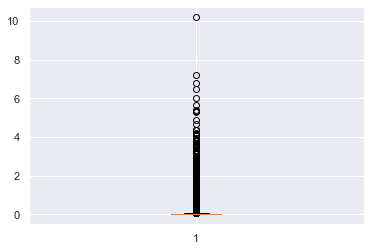

In [23]:
plt.boxplot(df["JP_Sales"])

In [24]:
df["JP_Sales"]=np.where(df["JP_Sales"]>7.5,7.5, df["JP_Sales"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b354ab370>,
 'caps': [<matplotlib.lines.Line2D at 0x13b354aba90>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b3549dfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x13b354b51f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b354b5580>],
 'means': []}

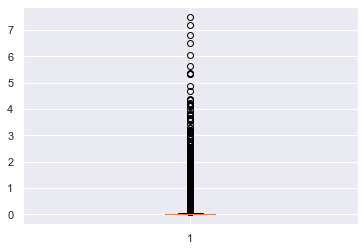

In [25]:
plt.boxplot(df["JP_Sales"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b35518490>,
 'caps': [<matplotlib.lines.Line2D at 0x13b35518bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b35518100>],
 'medians': [<matplotlib.lines.Line2D at 0x13b35521310>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b35521640>],
 'means': []}

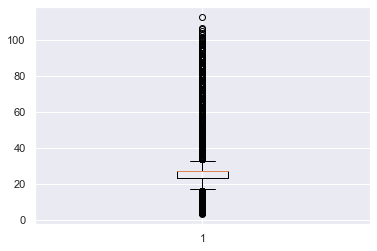

In [26]:
plt.boxplot(df["Critic_Count"])

In [27]:
df["Critic_Count"]=np.where(df["Critic_Count"]>110, 110, df["Critic_Count"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b35574d60>,
 'caps': [<matplotlib.lines.Line2D at 0x13b355834c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b355749d0>],
 'medians': [<matplotlib.lines.Line2D at 0x13b35583be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b35583fa0>],
 'means': []}

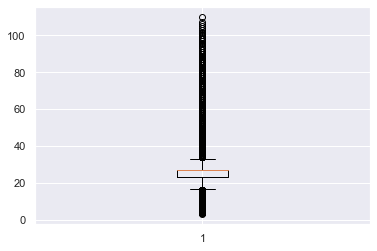

In [28]:
plt.boxplot(df["Critic_Count"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b365b0910>,
 'caps': [<matplotlib.lines.Line2D at 0x13b365be070>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b365b0580>],
 'medians': [<matplotlib.lines.Line2D at 0x13b365be790>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b365beb20>],
 'means': []}

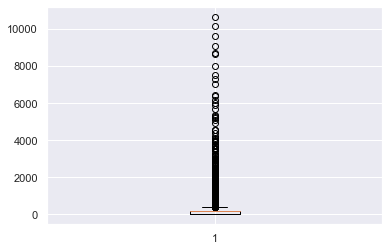

In [29]:
plt.boxplot(df["User_Count"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b36619610>,
 'caps': [<matplotlib.lines.Line2D at 0x13b36619d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b36619280>],
 'medians': [<matplotlib.lines.Line2D at 0x13b36626490>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b36626820>],
 'means': []}

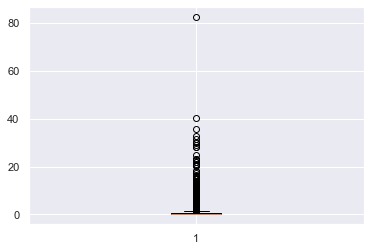

In [30]:
plt.boxplot(df["Global_Sales"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b36673820>,
 'caps': [<matplotlib.lines.Line2D at 0x13b36673f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b36673490>],
 'medians': [<matplotlib.lines.Line2D at 0x13b3667f6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b3667fa30>],
 'means': []}

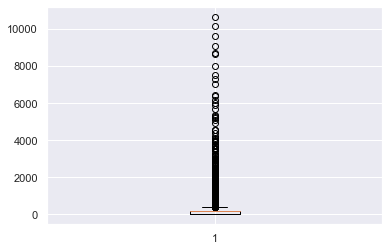

In [31]:
plt.boxplot(df["User_Count"])

In [32]:
df["Global_Sales"]=np.where(df["Global_Sales"]> 40,  40, df["Global_Sales"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b366d1850>,
 'caps': [<matplotlib.lines.Line2D at 0x13b366d1f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b366d1490>],
 'medians': [<matplotlib.lines.Line2D at 0x13b366dc6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b366dca60>],
 'means': []}

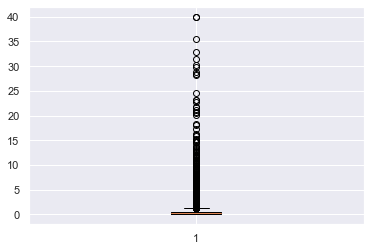

In [33]:
plt.boxplot(df["Global_Sales"])

## Normality Check

<AxesSubplot:xlabel='Global_Sales', ylabel='Density'>

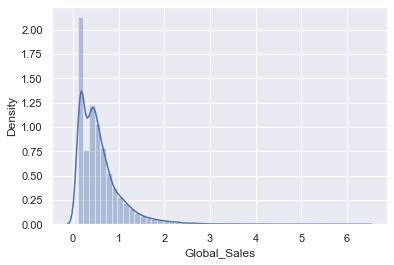

In [34]:
sns.distplot(np.sqrt(df["Global_Sales"]))

In [35]:
shapiro(df["Global_Sales"])
# Null Hypthesis : Data is normal
# Alter Hypothesis : Data is not normal

ShapiroResult(statistic=0.3235316872596741, pvalue=0.0)

<AxesSubplot:xlabel='Global_Sales', ylabel='Density'>

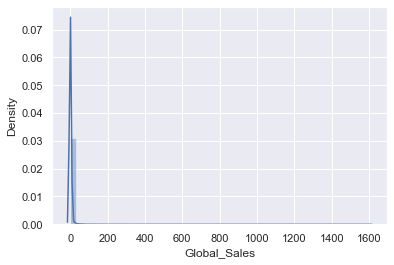

In [36]:
sns.distplot(np.square(df["Global_Sales"]))

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14576 entries, 0 to 14575
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             14576 non-null  object 
 1   Platform         14576 non-null  object 
 2   Year_of_Release  14576 non-null  object 
 3   Genre            14576 non-null  object 
 4   Publisher        14576 non-null  object 
 5   NA_Sales         14576 non-null  float64
 6   EU_Sales         14576 non-null  float64
 7   JP_Sales         14576 non-null  float64
 8   Critic_Score     14576 non-null  float64
 9   Critic_Count     14576 non-null  float64
 10  User_Score       14576 non-null  float64
 11  User_Count       14576 non-null  float64
 12  Developer        14576 non-null  object 
 13  Rating           14576 non-null  object 
 14  Global_Sales     14576 non-null  float64
dtypes: float64(8), object(7)
memory usage: 1.7+ MB


## Reading Test Dataset

In [38]:
dft=pd.read_csv("Test.csv")

In [39]:
dft

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.00,0.0,NaN,NaN,7.6,7.0,High Voltage Software,E
1,Shonen Jump's One Piece: Grand Battle,PS2,2005.0,Fighting,Atari,0.07,0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Learn Math,DS,2009.0,Puzzle,DreamCatcher Interactive,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Dreamcatcher,E
3,Nitrobike,Wii,2008.0,Racing,Ubisoft,0.11,0.01,0.0,49.0,22.0,7.1,7.0,Left Field Productions,E10+
4,Cruise Ship Vacation Games,Wii,2009.0,Puzzle,Avanquest,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Activision,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,Theresia...,DS,2008.0,Adventure,Arc System Works,0.05,0.00,0.0,61.0,6.0,8,8.0,WorkJam,M
2139,Sacred 2: Fallen Angel,PC,2008.0,Role-Playing,Ascaron Entertainment GmbH,0.00,0.05,0.0,71.0,41.0,6.9,203.0,"Ascaron Entertainment GmbH, Ascaron Entertainment",M
2140,Dance Sensation!,Wii,2010.0,Misc,Majesco Entertainment,0.06,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2141,Adventure Time: The Secret of the Nameless Kin...,X360,2014.0,Action,Little Orbit,0.00,0.05,0.0,58.0,5.0,7.5,4.0,WayForward,E10+


In [40]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2143 non-null   object 
 1   Platform         2143 non-null   object 
 2   Year_of_Release  2106 non-null   float64
 3   Genre            2143 non-null   object 
 4   Publisher        2138 non-null   object 
 5   NA_Sales         2143 non-null   float64
 6   EU_Sales         2143 non-null   float64
 7   JP_Sales         2143 non-null   float64
 8   Critic_Score     920 non-null    float64
 9   Critic_Count     920 non-null    float64
 10  User_Score       1255 non-null   object 
 11  User_Count       794 non-null    float64
 12  Developer        1267 non-null   object 
 13  Rating           1246 non-null   object 
dtypes: float64(7), object(7)
memory usage: 234.5+ KB


## Changing User_score dtype from object to float

In [41]:
dft["User_Score"].unique()

array(['7.6', nan, 'tbd', '7.1', '2.2', '3.7', '7', '8.8', '7.8', '7.4',
       '6.3', '8.7', '6.7', '6.2', '5.9', '3.8', '9', '3.2', '6', '4.2',
       '8.2', '7.2', '8.3', '9.1', '5.6', '8.5', '6.6', '7.3', '7.5',
       '6.8', '2.5', '9.2', '3.1', '5.5', '8.1', '8', '5.7', '6.4', '6.9',
       '3.5', '3.9', '1.8', '6.5', '9.4', '5', '7.7', '2.4', '8.4', '3',
       '2', '4.8', '4.7', '5.2', '1.3', '4.9', '5.8', '4.5', '7.9', '4.3',
       '4', '5.4', '8.6', '2.1', '3.4', '0.2', '8.9', '1.4', '5.1', '6.1',
       '9.3', '1.7', '5.3', '3.3', '4.1', '2.8', '4.6', '2.7', '4.4',
       '1.5', '0.9'], dtype=object)

In [42]:
dft["User_Score"]=np.where(dft["User_Score"]=="tbd" ,0, dft["User_Score"])

In [43]:
dft["User_Score"]=np.where(dft["User_Score"]=="nan" ,0, dft["User_Score"])

In [44]:
dft["User_Score"].unique()

array(['7.6', nan, 0, '7.1', '2.2', '3.7', '7', '8.8', '7.8', '7.4',
       '6.3', '8.7', '6.7', '6.2', '5.9', '3.8', '9', '3.2', '6', '4.2',
       '8.2', '7.2', '8.3', '9.1', '5.6', '8.5', '6.6', '7.3', '7.5',
       '6.8', '2.5', '9.2', '3.1', '5.5', '8.1', '8', '5.7', '6.4', '6.9',
       '3.5', '3.9', '1.8', '6.5', '9.4', '5', '7.7', '2.4', '8.4', '3',
       '2', '4.8', '4.7', '5.2', '1.3', '4.9', '5.8', '4.5', '7.9', '4.3',
       '4', '5.4', '8.6', '2.1', '3.4', '0.2', '8.9', '1.4', '5.1', '6.1',
       '9.3', '1.7', '5.3', '3.3', '4.1', '2.8', '4.6', '2.7', '4.4',
       '1.5', '0.9'], dtype=object)

In [45]:
dft["User_Score"]=df["User_Score"].astype(float)

In [46]:
dft["User_Score"].dtypes

dtype('float64')

In [47]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2143 non-null   object 
 1   Platform         2143 non-null   object 
 2   Year_of_Release  2106 non-null   float64
 3   Genre            2143 non-null   object 
 4   Publisher        2138 non-null   object 
 5   NA_Sales         2143 non-null   float64
 6   EU_Sales         2143 non-null   float64
 7   JP_Sales         2143 non-null   float64
 8   Critic_Score     920 non-null    float64
 9   Critic_Count     920 non-null    float64
 10  User_Score       2143 non-null   float64
 11  User_Count       794 non-null    float64
 12  Developer        1267 non-null   object 
 13  Rating           1246 non-null   object 
dtypes: float64(8), object(6)
memory usage: 234.5+ KB


## Treatment of null values

In [48]:
dft["Year_of_Release"].fillna("2009.0", inplace = True)
dft["Publisher"].fillna("Electronic Arts", inplace = True)
dft["Critic_Score"].fillna(69.67, inplace = True)
dft["Critic_Count"].fillna(27.30, inplace = True)
dft["User_Count"].fillna(172.51, inplace = True)
dft["Developer"].fillna("Ubisoft", inplace = True)
dft["Rating"].fillna("E", inplace = True)
dft["User_Score"].fillna(7.15, inplace =True)

In [49]:
dft.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [50]:
dft.describe(percentiles=[0.01,0.02, .03,0.04, 0.05, 0.1, .2, .25, .3, .4, .5,.75,.9, .95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,...,40%,50%,75%,90%,95%,96%,97%,98%,99%,max
NA_Sales,2143.0,0.043999,0.036211,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,0.04,0.05,0.07,0.10,0.11,0.11,0.11,0.12,0.12,0.12
EU_Sales,2143.0,0.016253,0.020982,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,0.00,0.01,0.03,0.05,0.06,0.06,0.06,0.07,0.09,0.13
JP_Sales,2143.0,0.022804,0.038525,0.0,0.0,0.0,0.000,0.0,0.00,0.0,...,0.00,0.00,0.06,0.08,0.12,0.12,0.12,0.13,0.13,0.13
Critic_Score,2143.0,66.982926,9.668164,19.0,32.0,36.0,39.260,44.0,46.00,54.0,...,69.67,69.67,69.67,74.00,79.00,80.00,82.00,83.00,86.00,92.00
Critic_Count,2143.0,23.693374,9.078761,4.0,4.0,4.0,5.000,5.0,6.00,9.0,...,27.30,27.30,27.30,27.30,35.00,38.00,40.00,44.00,51.00,77.00
User_Score,2143.0,7.236654,1.554527,0.0,0.0,0.0,3.026,4.2,4.61,6.0,...,7.15,7.15,8.10,8.70,8.90,9.00,9.00,9.10,9.20,9.50
User_Count,2143.0,136.090523,245.965312,4.0,4.0,4.0,5.000,5.0,5.00,7.0,...,172.51,172.51,172.51,172.51,172.51,172.51,172.51,274.60,565.96,9851.00


{'whiskers': [<matplotlib.lines.Line2D at 0x13b3691b970>,
 'caps': [<matplotlib.lines.Line2D at 0x13b369260d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b3691b5e0>],
 'medians': [<matplotlib.lines.Line2D at 0x13b369267f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b36926b80>],
 'means': []}

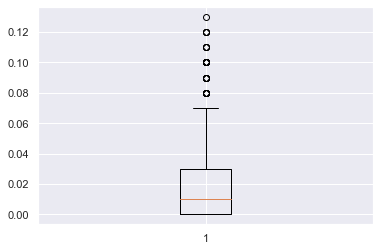

In [51]:
plt.boxplot(dft["EU_Sales"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b36985490>,
 'caps': [<matplotlib.lines.Line2D at 0x13b36985bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b36985100>],
 'medians': [<matplotlib.lines.Line2D at 0x13b369902b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b36990640>],
 'means': []}

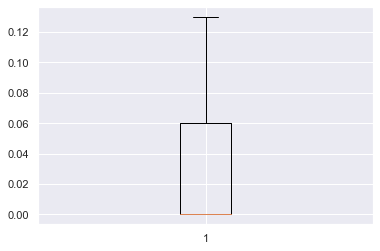

In [52]:
plt.boxplot(dft["JP_Sales"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b369ef3a0>,
 'caps': [<matplotlib.lines.Line2D at 0x13b369efac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b369dffd0>],
 'medians': [<matplotlib.lines.Line2D at 0x13b369f9220>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b369f95b0>],
 'means': []}

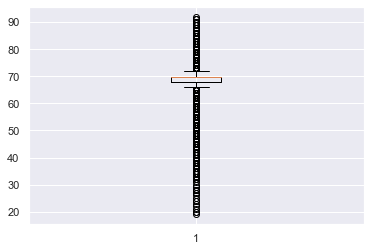

In [53]:
plt.boxplot(dft["Critic_Score"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b36a57850>,
 'caps': [<matplotlib.lines.Line2D at 0x13b36a57f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b36a574c0>],
 'medians': [<matplotlib.lines.Line2D at 0x13b36a64670>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b36a64a00>],
 'means': []}

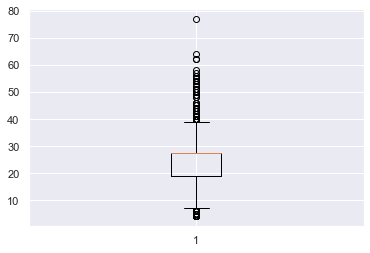

In [54]:
plt.boxplot(dft["Critic_Count"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b36abecd0>,
 'caps': [<matplotlib.lines.Line2D at 0x13b36acc430>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b36abe940>],
 'medians': [<matplotlib.lines.Line2D at 0x13b36accb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b36accee0>],
 'means': []}

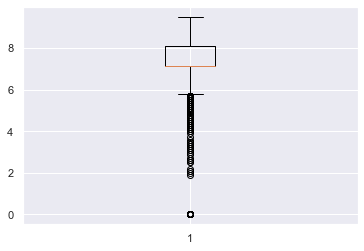

In [55]:
plt.boxplot(dft["User_Score"])

In [56]:
dft["User_Score"]=np.where(dft["User_Score"]<2,2, dft["User_Score"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b36b248b0>,
 'caps': [<matplotlib.lines.Line2D at 0x13b36b24fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b36b24520>],
 'medians': [<matplotlib.lines.Line2D at 0x13b36b326d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b36b32a60>],
 'means': []}

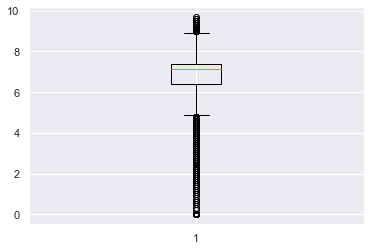

In [57]:
plt.boxplot(df["User_Score"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b36b921f0>,
 'caps': [<matplotlib.lines.Line2D at 0x13b36b92910>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b36b82e20>],
 'medians': [<matplotlib.lines.Line2D at 0x13b36b9e070>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b36b9e400>],
 'means': []}

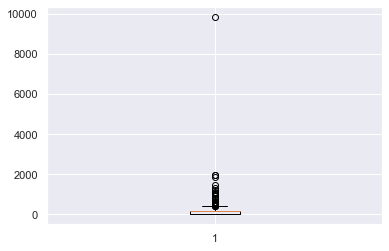

In [58]:
plt.boxplot(dft["User_Count"])

In [59]:
dft["User_Count"]=np.where(dft["User_Count"]>2000,2000, dft["User_Count"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b36bf2970>,
 'caps': [<matplotlib.lines.Line2D at 0x13b36bfd0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b36bf25e0>],
 'medians': [<matplotlib.lines.Line2D at 0x13b36bfd7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b36bfdb80>],
 'means': []}

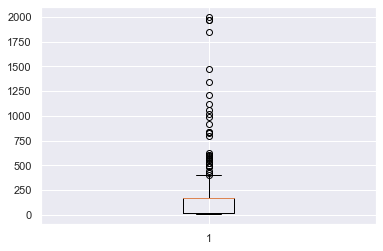

In [60]:
plt.boxplot(dft["User_Count"])

{'whiskers': [<matplotlib.lines.Line2D at 0x13b36c643d0>,
 'caps': [<matplotlib.lines.Line2D at 0x13b36c64af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13b36c64040>],
 'medians': [<matplotlib.lines.Line2D at 0x13b36c6e250>],
 'fliers': [<matplotlib.lines.Line2D at 0x13b36c6e5e0>],
 'means': []}

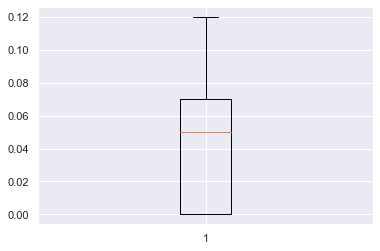

In [61]:
plt.boxplot(dft["NA_Sales"])

In [62]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2143 non-null   object 
 1   Platform         2143 non-null   object 
 2   Year_of_Release  2143 non-null   object 
 3   Genre            2143 non-null   object 
 4   Publisher        2143 non-null   object 
 5   NA_Sales         2143 non-null   float64
 6   EU_Sales         2143 non-null   float64
 7   JP_Sales         2143 non-null   float64
 8   Critic_Score     2143 non-null   float64
 9   Critic_Count     2143 non-null   float64
 10  User_Score       2143 non-null   float64
 11  User_Count       2143 non-null   float64
 12  Developer        2143 non-null   object 
 13  Rating           2143 non-null   object 
dtypes: float64(7), object(7)
memory usage: 234.5+ KB


## Create Dummies 

In [65]:
df1=pd.get_dummies(df, 
                     columns=["Name","Platform","Genre","Publisher","Developer","Rating","Year_of_Release"],
              drop_first=True)

In [66]:
dft1=pd.get_dummies(dft, 
                     columns=["Name","Platform","Genre","Publisher","Developer","Rating","Year_of_Release"],
              drop_first=True)

In [69]:
y=df1["Global_Sales"]
X=df1.drop(columns=["Global_Sales"])

In [70]:
X_train,X_test, y_train, y_test=train_test_split(X,y, test_size=.3, random_state=88)

In [71]:
Lr=LinearRegression()

In [72]:
Lr.fit(X_train, y_train)

LinearRegression()

In [73]:
Lr.score(X_train, y_train)

0.9991798741299239

In [74]:
Lr.score(X_test, y_test)

-130841595759.52364

In [75]:
pred_train=Lr.predict(X_train)
pred_test=Lr.predict(X_test)

In [76]:
print("RMSE", np.sqrt(np.mean(np.square(y_train-pred_train))))

RMSE 0.043778390727393986


In [77]:
df2

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Nicktoons: MLB,X360,2011.0,Sports,Take-Two Interactive,0.12,0.00,0.0,NaN,NaN,7.6,7.0,High Voltage Software,E
1,Shonen Jump's One Piece: Grand Battle,PS2,2005.0,Fighting,Atari,0.07,0.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Learn Math,DS,2009.0,Puzzle,DreamCatcher Interactive,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Dreamcatcher,E
3,Nitrobike,Wii,2008.0,Racing,Ubisoft,0.11,0.01,0.0,49.0,22.0,7.1,7.0,Left Field Productions,E10+
4,Cruise Ship Vacation Games,Wii,2009.0,Puzzle,Avanquest,0.12,0.00,0.0,NaN,NaN,tbd,NaN,Activision,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138,Theresia...,DS,2008.0,Adventure,Arc System Works,0.05,0.00,0.0,61.0,6.0,8,8.0,WorkJam,M
2139,Sacred 2: Fallen Angel,PC,2008.0,Role-Playing,Ascaron Entertainment GmbH,0.00,0.05,0.0,71.0,41.0,6.9,203.0,"Ascaron Entertainment GmbH, Ascaron Entertainment",M
2140,Dance Sensation!,Wii,2010.0,Misc,Majesco Entertainment,0.06,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2141,Adventure Time: The Secret of the Nameless Kin...,X360,2014.0,Action,Little Orbit,0.00,0.05,0.0,58.0,5.0,7.5,4.0,WayForward,E10+


In [78]:
print("RMSE", np.sqrt(np.mean(np.square(y_test-pred_test))))

RMSE 561759.2999344243
